# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
#Seu código aqui
#Verificando os tipos de dados
df.dtypes

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

In [4]:
#Verificando dados nulos
df.isnull().sum() 

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

**Como não existem dados nulos não existe o porque de uma remoção ou substituição**

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [5]:
#Seu código aqui
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


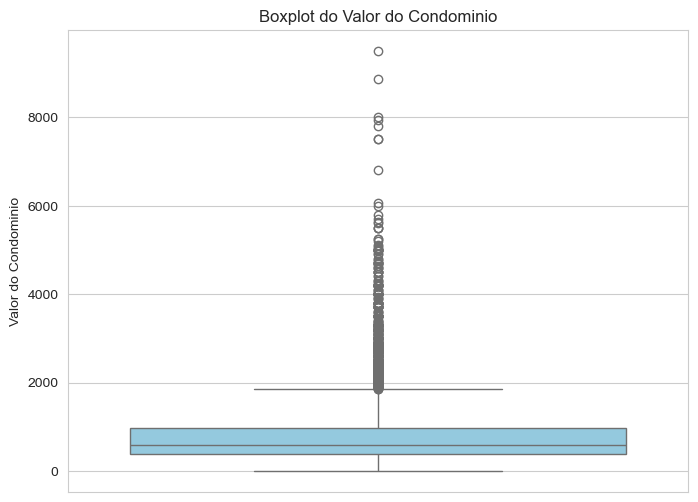

In [6]:
#Boxplot do valor do condominio
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Valor_Condominio', color='skyblue')
plt.title('Boxplot do Valor do Condominio')
plt.ylabel('Valor do Condominio')
plt.show()

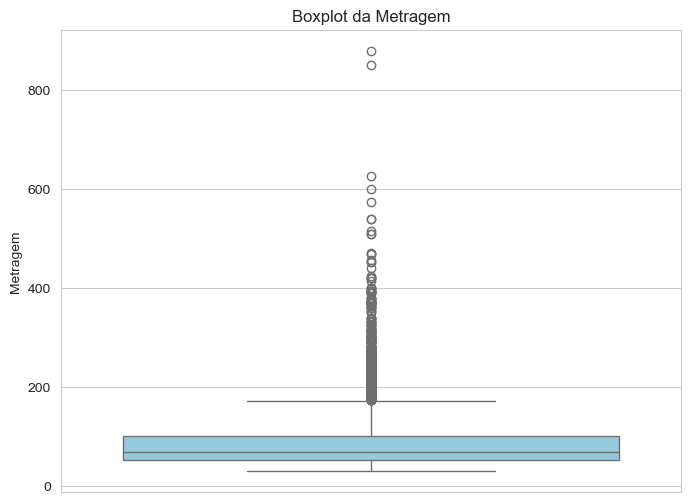

In [7]:
#Boxplot da metragem
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Metragem', color='skyblue')
plt.title('Boxplot da Metragem')
plt.ylabel('Metragem')
plt.show()

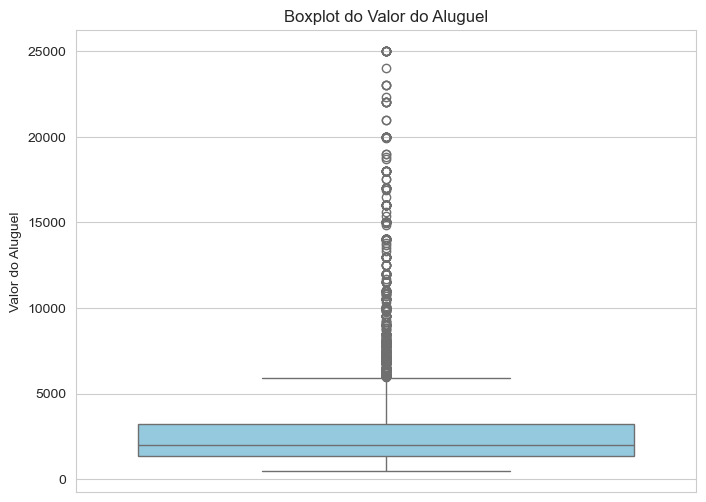

In [8]:
#Valor do Aluguel
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Valor_Aluguel', color='skyblue')
plt.title('Boxplot do Valor do Aluguel')
plt.ylabel('Valor do Aluguel')
plt.show()

In [9]:
#Os valores de aluguém, metragem e condominio possuem diversos outliers então será necessário tratar
colunas = ['Valor_Aluguel', 'Valor_Condominio', 'Metragem']

# Tratar outliers
for col in colunas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df[col] = df[col].clip(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

#Salvando o df agora sem os outliers
df.to_csv('Aluguel_sem_outliers.csv')

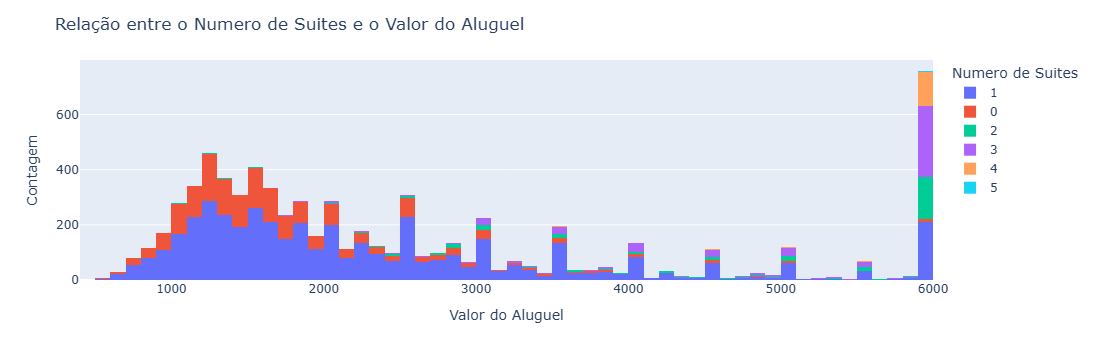

In [10]:
#C) Análise Bivariada
#C.1) Relação entre o valor do aluguel e o numero de suites
fig = px.histogram(df, x='Valor_Aluguel', color='N_Suites', barmode='stack')

fig.update_layout(title='Relação entre o Numero de Suites e o Valor do Aluguel',
                  xaxis_title='Valor do Aluguel',
                  yaxis_title='Contagem',
                  legend_title='Numero de Suites')

fig.show()   

**Neste primeiro gráfico notamos que o valor do aluguém sobe a medida que o numero de suites também aumenta**

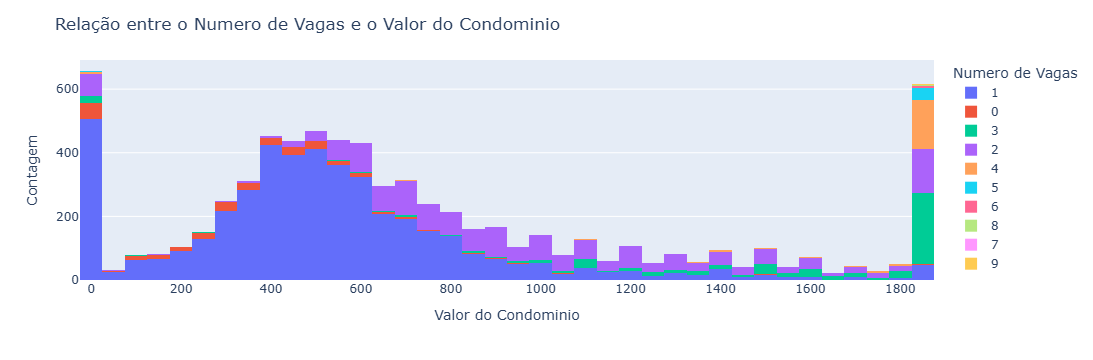

In [11]:
# C.2) Numero de vagas e o valor do condominio
fig = px.histogram(df, x='Valor_Condominio', color='N_Vagas', barmode='stack')

fig.update_layout(title='Relação entre o Numero de Vagas e o Valor do Condominio',
                  xaxis_title='Valor do Condominio',
                  yaxis_title='Contagem',
                  legend_title='Numero de Vagas')

fig.show()   

**Apesar de poucos apartamentos com muitas vagas podemos perceber que a quantidade de vagas também influência no valor do condominio**

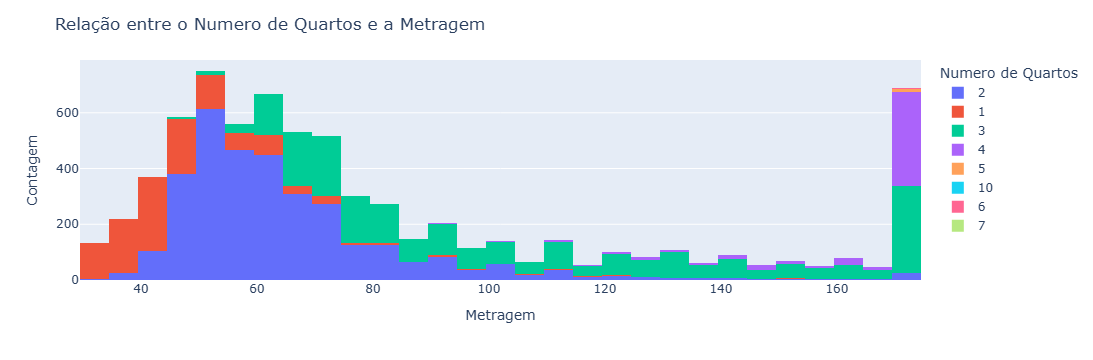

In [12]:
#C.3) Numero de quartos com a metragem
fig = px.histogram(df, x='Metragem', color='N_Quartos', barmode='stack')

fig.update_layout(title='Relação entre o Numero de Quartos e a Metragem',
                  xaxis_title='Metragem',
                  yaxis_title='Contagem',
                  legend_title='Numero de Quartos')

fig.show()   

**Podemos notar que a metragem aumenta conforme o numero de quartos também aumenta**

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




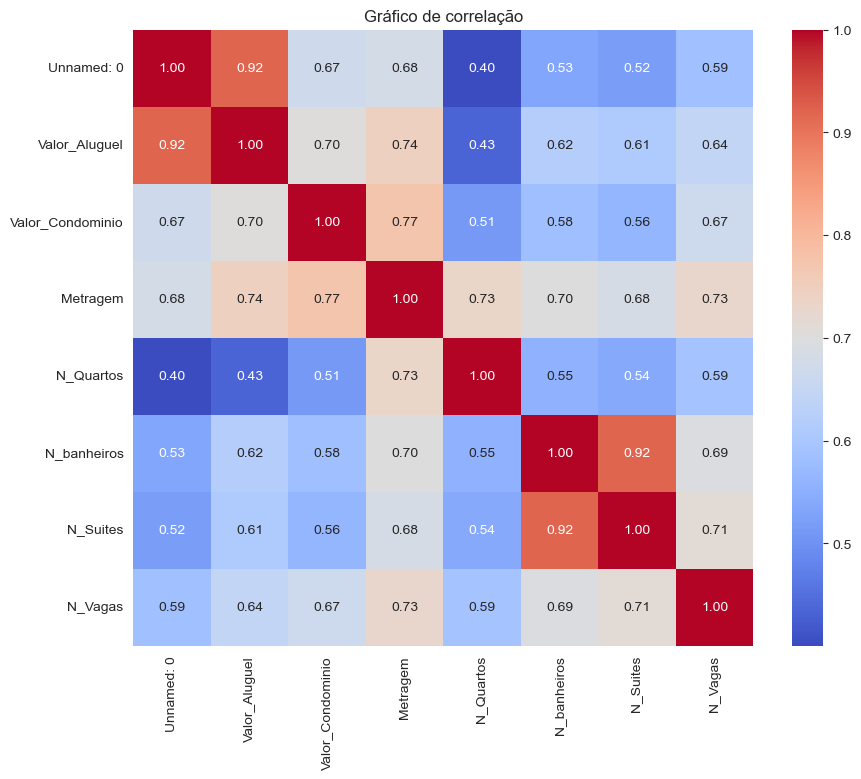

In [13]:
#Seu código aqui
df = pd.read_csv('Aluguel_sem_outliers.csv')

correlacao = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlacao,annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Gráfico de correlação')
plt.show()

**A primeira vista as variáveis que parecem bem fortes, são: numero de banheiros com o numero de suites quase se explicando, a metragem com o valor do condominio, o valor do condominio com o valor do aluguel e a metragem com o valor do aluguel**


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [14]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [15]:
# Seu código aqui
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [16]:
X_train

,Unnamed: 0,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
6931,6931,1350.0,172,3,4,3,3
4125,4125,680.0,70,1,1,0,2
6079,6079,650.0,66,2,1,0,1
5044,5044,655.0,68,3,2,1,1
2299,2299,330.0,33,1,1,0,1
...,...,...,...,...,...,...,...
3772,3772,450.0,48,2,2,1,1
5191,5191,570.0,34,1,1,0,1
5226,5226,976.0,95,2,2,1,1
5390,5390,550.0,74,3,3,1,2


In [17]:
X_test

,Unnamed: 0,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
3885,3885,484.0,50,2,1,0,1
4661,4661,680.0,50,2,1,0,1
1038,1038,0.0,58,2,2,1,1
5867,5867,1226.0,127,3,1,0,2
5099,5099,697.0,90,4,3,1,2
...,...,...,...,...,...,...,...
4689,4689,1250.0,160,3,3,1,2
5313,5313,530.0,43,1,2,1,1
5624,5624,1250.0,147,4,4,2,3
4647,4647,650.0,53,2,1,0,1


In [18]:
y_train

6931    5975
4125    2200
6079    4500
5044    2900
2299    1500
        ... 
3772    2000
5191    3000
5226    3000
5390    3200
860     1100
Name: Valor_Aluguel, Length: 5402, dtype: int64

In [19]:
y_test

3885    2100
4661    2500
1038    1200
5867    4000
5099    3000
        ... 
4689    2550
5313    3100
5624    3500
4647    2500
4453    2500
Name: Valor_Aluguel, Length: 1801, dtype: int64

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [38]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [49]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
from sklearn.linear_model import LinearRegression

regressao_metragem = LinearRegression()

regressao_metragem.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [50]:
#Seu código Aqui
# Intercept_
regressao_metragem.coef_

array([28.41358295])

In [51]:
regressao_metragem.intercept_

np.float64(218.34185060698746)

Nossa equação seria:  

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [53]:
#Seu código aqui
regressao_metragem.score(X,y)

0.5509199330221528

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

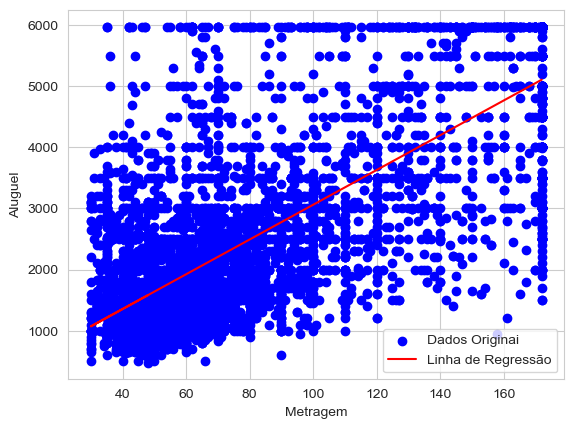

In [56]:
# Seu código aqui
import numpy as np

plt.scatter(X, y, color='blue', label='Dados Originai')

# Plotar a linha de regressão
plt.plot(X, regressao_metragem.predict(X), color='red', label='Linha de Regressão')
plt.xlabel('Metragem')
plt.ylabel('Aluguel')
plt.legend()
plt.show()

**Podemos perceber que o nosso Aluguém aumenta na medida que a metragem também aumenta**

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [58]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [59]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = regressao_metragem.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_metragem.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5668903907354735


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Escreva sua resposta aqui.

**Os valores encontrados no treino e no teste estão bem proximos no treino o valor encontrado foi 0.55091 e no teste o valor foi de 0.5668**

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [72]:
#seu código aqui
X = X_train[['Metragem','Valor_Condominio','N_Quartos','N_banheiros','N_Suites','N_Vagas']]  # Variável independente (características)
y = y_train

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [64]:
#seu código aqui
from sklearn.linear_model import LinearRegression

regressao_multipla = LinearRegression()

regressao_multipla.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


C) Traga o valor do R quadrado e avalie o valor encontrado.

In [66]:
#seu código aqui
regressao_multipla.score(X,y)

0.6392440291138791

**O valor encontrado foi proximo do valor qu estava estimado na celula que era 0.6072**

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [80]:
#seu código aqui

X_test = X[['Metragem','Valor_Condominio','N_Quartos','N_banheiros','N_Suites','N_Vagas']]
y_test = y

In [82]:
regressao_multipla.fit(X_test,y_test)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
previsoes = regressao_multipla.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_multipla.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.6392440291138791


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Digite sua resposta aqui

**Acredito que o R quadrado da regressão multipla me parece melhor por trazer mesmo as variavéis com pouca correlação contribuem para um maior R quadrado do modelo**